In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#!ls 'drive/MyDrive'

In [ ]:
#!wget -P 'drive/MyDrive' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
import os

In [ ]:
train_dog_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_filtered/train/dogs')
train_cat_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_filtered/train/cats')
validation_dog_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_filtered/validation/dogs')
validation_cat_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_filtered/validation/cats')

In [ ]:
train_dog = os.listdir(train_dog_dir)
train_cat = os.listdir(train_cat_dir)
validation_dog = os.listdir(validation_dog_dir)
validation_cat = os.listdir(validation_cat_dir)
print(train_dog[:10])
print(train_cat[:10])
print(validation_dog[:10])
print(validation_cat[:10])

['dog.10.jpg', 'dog.0.jpg', 'dog.100.jpg', 'dog.1.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.10.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.0.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.2030.jpg', 'dog.2007.jpg', 'dog.2000.jpg', 'dog.2005.jpg', 'dog.2021.jpg', 'dog.2006.jpg', 'dog.2025.jpg', 'dog.2028.jpg', 'dog.2024.jpg', 'dog.2017.jpg']
['cat.2007.jpg', 'cat.2008.jpg', 'cat.2011.jpg', 'cat.2001.jpg', 'cat.2010.jpg', 'cat.2009.jpg', 'cat.2000.jpg', 'cat.2002.jpg', 'cat.2005.jpg', 'cat.2012.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

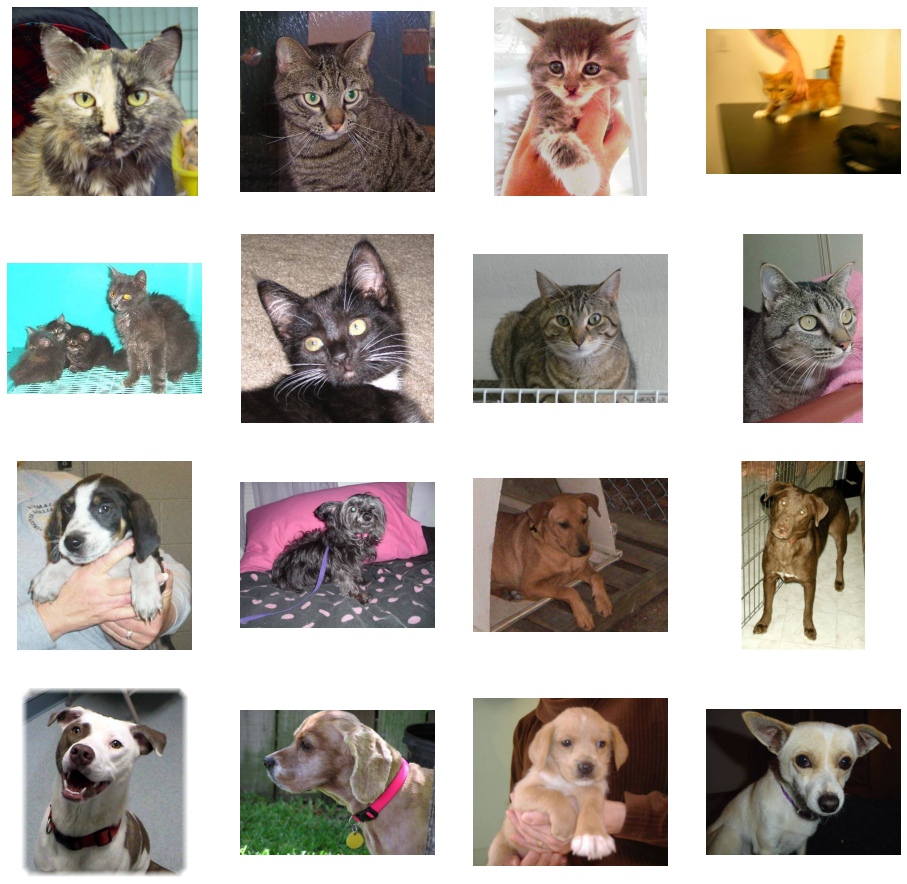

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(34,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 34)        4930      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 34)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        19648     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs_filtered/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs_filtered/validation',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 19s - loss: 0.7625 - accuracy: 0.6140 - val_loss: 0.5578 - val_accuracy: 0.7200
Epoch 2/15
100/100 - 19s - loss: 0.6346 - accuracy: 0.6480 - val_loss: 0.5467 - val_accuracy: 0.7500
Epoch 3/15
100/100 - 19s - loss: 0.6441 - accuracy: 0.6720 - val_loss: 0.6259 - val_accuracy: 0.7180
Epoch 4/15
100/100 - 19s - loss: 0.6137 - accuracy: 0.6895 - val_loss: 0.5294 - val_accuracy: 0.7520
Epoch 5/15
100/100 - 20s - loss: 0.5973 - accuracy: 0.6950 - val_loss: 0.5888 - val_accuracy: 0.7130
Epoch 6/15
100/100 - 19s - loss: 0.5920 - accuracy: 0.7015 - val_loss: 0.5935 - val_accuracy: 0.7050
Epoch 7/15
100/100 - 19s - loss: 0.5871 - accuracy: 0.6920 - val_loss: 0.5203 - val_accuracy: 0.7510
Epoch 8/15
100/100 - 19s - loss: 0.5909 - accuracy: 0.6900 - val_loss: 0.5733 - val_accuracy: 0.6890
Epoch 9/15
100/100 - 19s - loss: 0.6004 - accuracy: 0.6950 - val_loss: 0.5215 - val_accuracy: 0.7510
Epoch 10/15
100/100 - 20s - loss: 0.5718 - accuracy: 0.7155 - val_loss: 0.5060 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

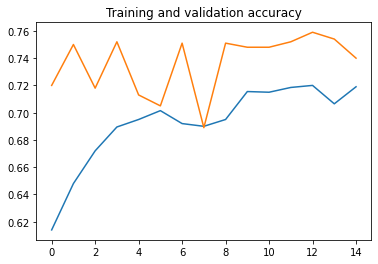

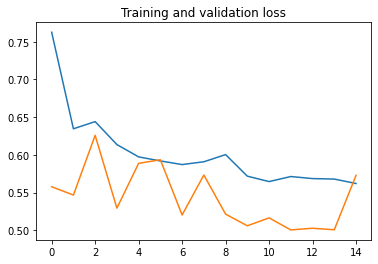

In [36]:
 #Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path,target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving pug-801826_640.jpg to pug-801826_640 (4).jpg
[1.]
pug-801826_640.jpg is a dog
